Q1. What is Gradient Boosting Regression?

Gradient Boosting

Gradient Boosting is a powerful boosting algorithm that combines several weak learners into strong learners, in which each new model is trained to minimize the loss function such as mean squared error or cross-entropy of the previous model using gradient descent. In each iteration, the algorithm computes the gradient of the loss function with respect to the predictions of the current ensemble and then trains a new weak model to minimize this gradient. The predictions of the new model are then added to the ensemble, and the process is repeated until a stopping criterion is met.

Q2. Implement a simple gradient boosting algorithm from scratch using Python and NumPy. Use a simple regression problem as an example and train the model on a small dataset. Evaluate the model's performance using metrics such as mean squared error and R-squared.

Mean Squared Error (MSE): 0.0002
R-squared (R2): 0.9996


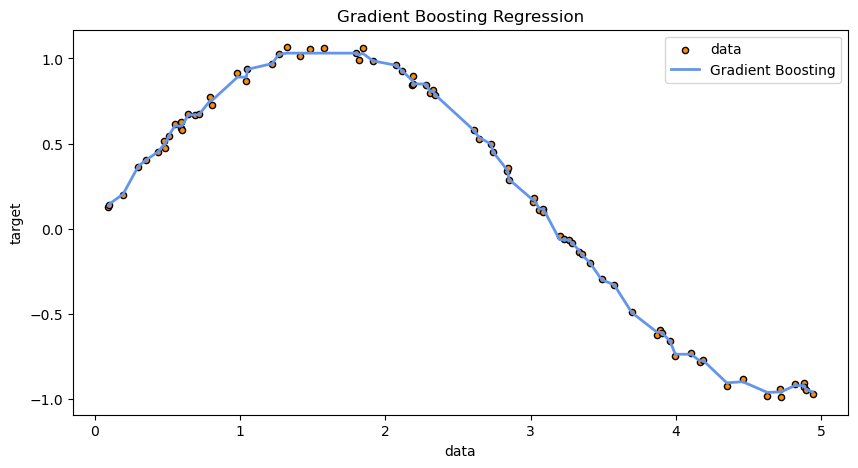

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Generate synthetic data for the regression problem
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.rand(80) * 0.1

# Number of boosting iterations
n_estimators = 100

# Learning rate (step size)
learning_rate = 0.1

# Initialize the model with the mean of the target values
F = np.mean(y) * np.ones_like(y)

# Create an empty array to store the weak learners
weak_learners = []

# Gradient Boosting training
for _ in range(n_estimators):
    # Calculate the negative gradient (residuals)
    residuals = y - F

    # Create a decision tree regressor as a weak learner
    weak_learner = DecisionTreeRegressor(max_depth=2)
    
    # Fit the weak learner to the negative gradient (residuals)
    weak_learner.fit(X, residuals)
    
    # Make predictions with the weak learner
    weak_predictions = weak_learner.predict(X)
    
    # Update the ensemble predictions with the weighted predictions of the weak learner
    F += learning_rate * weak_predictions
    
    # Store the weak learner in the list
    weak_learners.append(weak_learner)

# Evaluate the model
y_pred = F

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X, y_pred, color="cornflowerblue", linewidth=2, label="Gradient Boosting")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Gradient Boosting Regression")
plt.legend()
plt.show()


Q3. Experiment with different hyperparameters such as learning rate, number of trees, and tree depth to optimise the performance of the model. Use grid search or random search to find the best hyperparameters.

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Mean Squared Error (MSE): 99.3541
R-squared (R2): 0.9864


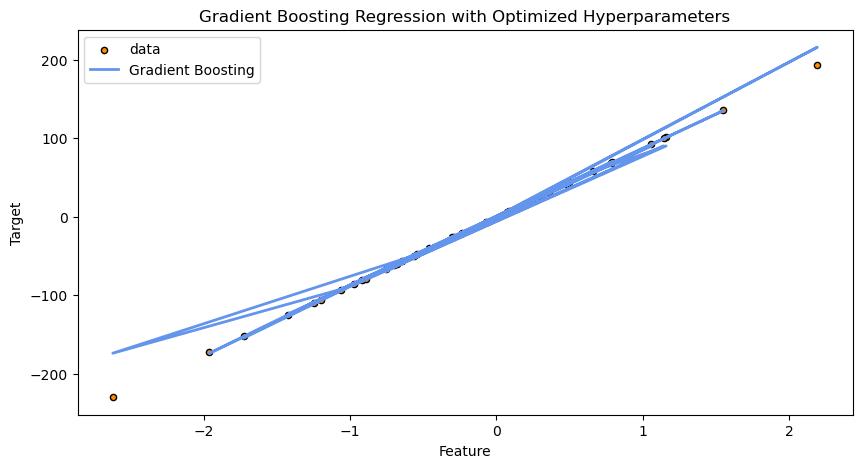

In [1]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Generate synthetic data for regression
X, y = make_regression(n_samples=200, n_features=1, noise=0.3, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Define the hyperparameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate (step size)
    'max_depth': [1, 2, 3]  # Maximum depth of individual trees
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a model with the best hyperparameters
best_gb_regressor = GradientBoostingRegressor(**best_params, random_state=42)
best_gb_regressor.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_gb_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred, color="cornflowerblue", linewidth=2, label="Gradient Boosting")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Gradient Boosting Regression with Optimized Hyperparameters")
plt.legend()
plt.show()


Q4. What is a weak learner in Gradient Boosting?

In Gradient Boosting, a "weak learner" refers to a base model or a simple model that is used as a component in the ensemble. These weak learners are typically simple decision trees, often referred to as "stumps," which are decision trees with a very limited depth (e.g., only one level or a few levels). Weak learners are intentionally kept simple to ensure that they are not highly accurate on their own.

The concept of using weak learners in Gradient Boosting is essential to the algorithm's effectiveness. The intuition behind it is that by combining many weak learners, each of which focuses on a specific aspect of the problem, you can create a strong ensemble model that captures complex relationships within the data. Here's how weak learners fit into the Gradient Boosting process:

1. Sequential Building: Gradient Boosting builds an ensemble of weak learners sequentially.
   
2. Residual Learning: In each iteration, a new weak learner is trained on the residuals (the differences between the actual target values and the current ensemble's predictions). This means that the weak learner aims to correct the errors made by the ensemble up to that point.

3. Contribution to Ensemble: Once trained, the weak learner's predictions are combined with the predictions of the previous weak learners to update the ensemble's overall prediction. The contribution of each weak learner to the ensemble's prediction is typically weighted based on its accuracy or ability to reduce the error.

4. Sequential Learning: The process repeats for a predetermined number of iterations, with each new weak learner focusing on addressing the remaining errors or residuals in the data.


Q5. What is the intuition behind the Gradient Boosting algorithm?

The intuition behind Gradient Boosting is that it builds a strong ensemble of simple models by emphasizing the correction of errors. It iteratively optimizes the ensemble's predictions based on the gradient of the loss function, leading to accurate and robust predictive models. This technique has proven to be highly effective in various machine learning tasks and is a go-to choice for regression and classification problems where high accuracy is required. Here's a more detailed explanation of the intuition behind Gradient Boosting:

1. Sequential Error Correction: Gradient Boosting works by sequentially adding "weak learners" (typically simple decision trees) to the ensemble, with each learner focusing on correcting the errors made by the ensemble up to that point. In other words, it breaks down a complex prediction problem into a series of simpler sub-problems.

2. Gradient Descent Optimization: The algorithm employs gradient descent optimization to determine how each new learner should adjust the ensemble's predictions. It calculates the gradient (slope) of the loss function (typically mean squared error for regression) with respect to the current predictions. This gradient indicates the direction and magnitude of the correction needed to minimize the loss.

3. Combining Weak Predictions: Each weak learner contributes its predictions to the ensemble, weighted by its ability to reduce the loss. Those learners that perform better at correcting errors receive higher weights in the ensemble, while weaker learners receive lower weights.

4. Collective Wisdom: The strength of the Gradient Boosting ensemble comes from the collective wisdom of all the weak learners working together. Even though each individual learner is relatively simple and may have limited predictive power, their combined efforts result in a strong model capable of capturing complex relationships in the data.

5. Adaptive Learning: Gradient Boosting is an adaptive learning algorithm. As it adds new learners to the ensemble, it adapts to the training data by focusing on the examples that are difficult to predict. This adaptability allows it to excel in both bias and variance reduction.

6. Ensemble Generalization: By aggregating the predictions of multiple models, Gradient Boosting reduces the risk of overfitting. The ensemble is guided by the principle of Occam's razor, favoring simpler models when the training data allows, which contributes to its generalization ability.



Q6. How does Gradient Boosting algorithm build an ensemble of weak learners?

The Gradient Boosting algorithm builds an ensemble of weak learners (typically decision trees) sequentially. Each weak learner is added to the ensemble to correct the errors made by the previous learners. Here's a step-by-step explanation of how Gradient Boosting builds this ensemble:

1. Initialization:
   - Gradient Boosting starts with an initial prediction, which is often a simple estimate like the mean or median of the target variable for all training samples.
   - The initial prediction represents the "zeroth learner" in the ensemble.

2. Sequential Model Building:
   - Gradient Boosting builds a sequence of weak learners one at a time, typically decision trees.
   - Each new weak learner is designed to correct the errors (residuals) made by the ensemble of learners built up to that point.

3. Residual Calculation:
   - After each iteration, the algorithm calculates the residuals, which are the differences between the actual target values and the current ensemble's predictions.
   - The residuals represent the errors made by the ensemble, and they serve as the new target variable for the next weak learner.

4. Gradient Descent Optimization:
   - Gradient Boosting uses gradient descent optimization to determine how the new weak learner should adjust the ensemble's predictions to minimize the loss function (typically mean squared error for regression).
   - The gradient (slope) of the loss function with respect to the current predictions is computed, indicating the direction and magnitude of the correction needed.

5. Learning Rate:
   - A hyperparameter known as the learning rate controls the step size during the gradient descent process. It determines how aggressively the model adjusts its predictions at each step.
   - Smaller learning rates result in slower but potentially more stable convergence, while larger learning rates can lead to faster convergence but may require careful tuning.

6. Ensemble Combination:
   - The predictions made by each individual weak learner in the ensemble are combined to update the ensemble's overall prediction.
   - The contribution of each weak learner is typically weighted based on its accuracy or ability to reduce the error.
   - The weighted combination of weak learners' predictions represents the updated prediction of the ensemble.

7. Iteration:
   - Steps 3 to 6 are repeated for a predetermined number of iterations or until a stopping criterion is met (e.g., a specified level of accuracy is achieved).

8. Final Model:
   - The final model is the ensemble of all the trained weak learners, each contributing to the final prediction with a specific weight.


Q7. What are the steps involved in constructing the mathematical intuition of Gradient Boosting algorithm?

Constructing the mathematical intuition of the Gradient Boosting algorithm involves understanding the core mathematical principles and equations that underlie the algorithm's operation. Here are the key steps to develop the mathematical intuition for Gradient Boosting:

1. Loss Function:
   - Start with a well-defined loss function that quantifies the difference between the actual target values (y) and the current model's predictions (F(x)). In regression problems, the commonly used loss function is mean squared error (MSE):

==> L(y, F(x)) = (y - F(x))^2

   - This loss function represents how far off the predictions are from the true values.

2. Initialize the Model:
   - Initialize the model with a simple prediction, often a constant value that minimizes the loss function. This can be the mean or median of the target values.

3. Gradient Descent:
   - Use gradient descent optimization to update the model's predictions in each iteration. Gradient descent aims to minimize the loss function by iteratively adjusting the model's parameters (predictions).
   - Calculate the gradient of the loss function with respect to the model's predictions:
     
==> ∂L/∂F(x) = -2(y - F(x))
     
   - Update the model's predictions in the direction of the negative gradient to reduce the loss:
     
==> F(x) ← F(x) - η * ∂L/∂F(x)

     Here, η (eta) represents the learning rate, which determines the step size of the updates. Smaller η values lead to more cautious updates, while larger η values can result in faster convergence but may require tuning.

4. Sequential Model Building:
   - Add a weak learner (usually a decision tree) to the model in each iteration.
   - Train the weak learner to predict the negative gradient (-∂L/∂F(x)) of the loss function with respect to the current model's predictions.
   - This step is crucial because the weak learner should focus on correcting the errors or residuals made by the current model.

5. Combine Predictions:
   - Combine the predictions of the weak learners with the current model's predictions to obtain the updated ensemble prediction.
   - Each weak learner's prediction is typically weighted based on its accuracy or ability to reduce the loss.

6. Iteration:
   - Repeat steps 3 to 5 for a predetermined number of iterations or until a stopping criterion is met. In each iteration, the model is updated to minimize the loss function by considering the residuals and the contributions of the weak learners.

7. Final Ensemble:
   - The final model is the ensemble of all the trained weak learners, each contributing to the final prediction with a specific weight.

By following these mathematical steps, Gradient Boosting builds an ensemble that learns to approximate the target values more accurately with each iteration, ultimately leading to a strong predictive model that captures complex relationships in the data.